### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale,StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import pickle

### Loading Dataset

In [2]:
df = pd.read_csv('SeoulBikeData.csv')
df.shape

(8760, 14)

#### Basic EDA

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.describe()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [5]:
df.Seasons.value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [6]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [3]:
df['IsHoliday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [4]:
Le = LabelEncoder()
df['Functioning Day'] = Le.fit_transform(df['Functioning Day'])

In [5]:
df['Seasons'].replace('Winter',1,inplace=True)
df['Seasons'].replace('Autumn',3,inplace=True)
df['Seasons'].replace('Spring',2,inplace=True)
df['Seasons'].replace('Summer',4,inplace=True)

In [6]:
df.drop(['Holiday'],axis=1,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


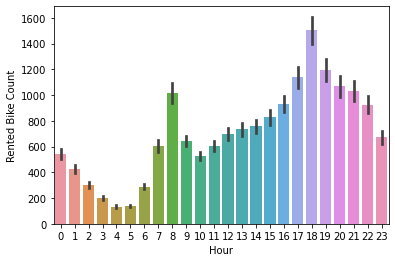

In [4]:
sns.barplot('Hour','Rented Bike Count',data=df)
plt.show()

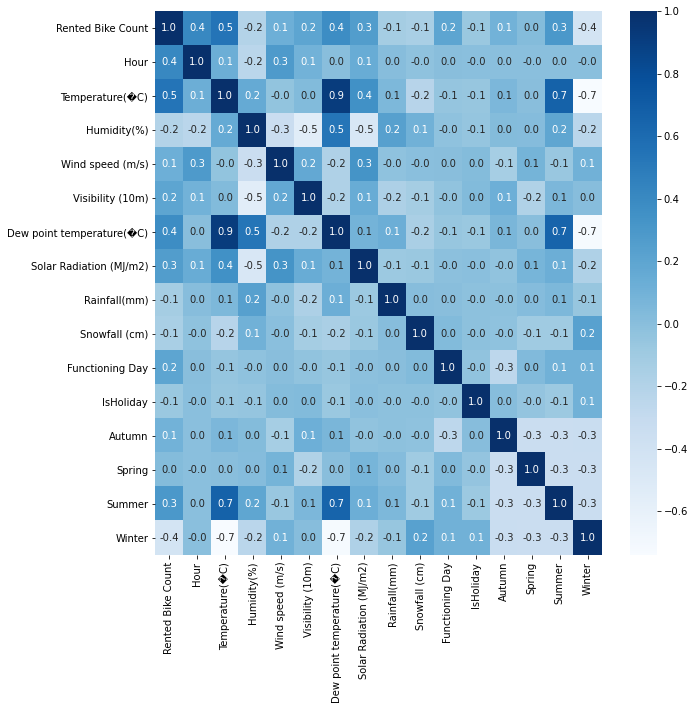

In [16]:
corelation = df.corr()
plt.figure(figsize=[10,10])
sns.heatmap(corelation,cmap='Blues',fmt='.1f',annot=True)
plt.show()

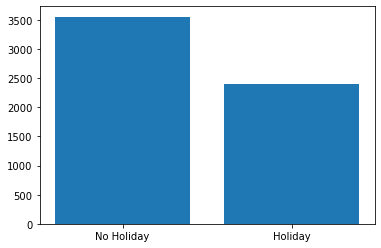

In [6]:
plt.bar(x='Holiday',height='Rented Bike Count',data=df)
plt.show()

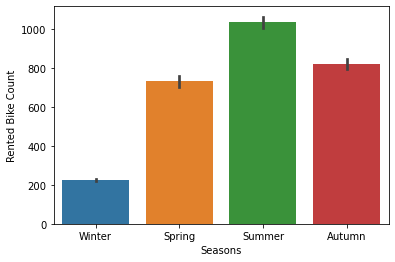

In [7]:
sns.barplot(x='Seasons',y='Rented Bike Count',data=df)
plt.show()

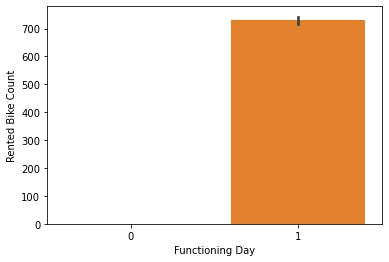

In [9]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


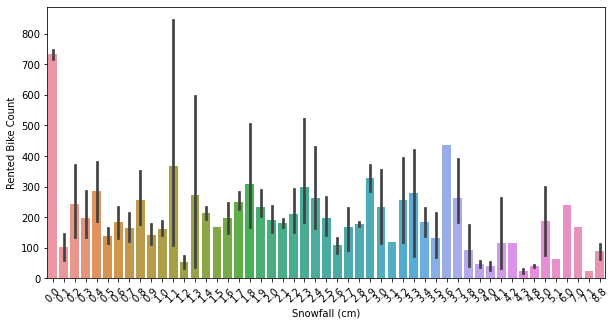

In [18]:
plt.figure(figsize=[10,5])
sns.barplot('Snowfall (cm)','Rented Bike Count',data=df,)
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


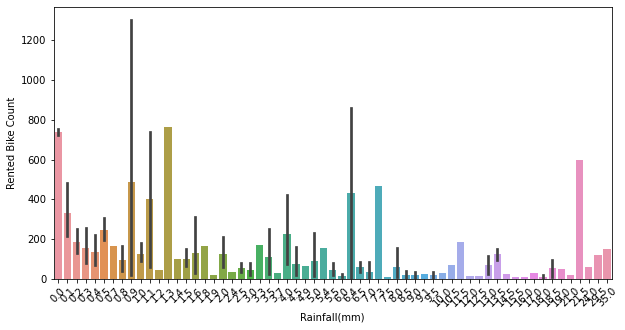

In [22]:
plt.figure(figsize=[10,5])
sns.barplot('Rainfall(mm)','Rented Bike Count',data=df)
plt.xticks(rotation=45)
plt.show()

#### Splitting Data

In [7]:
X = df.iloc[:,2:]
y = df['Rented Bike Count']
X.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,IsHoliday
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1,0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1,0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1,0


#### Scaling Data

In [8]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=12)

#### Linear Regression

In [10]:
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
y_pred = Linear_model.predict(X_test)
print('Mean absolute Error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))

Mean absolute Error : 327.0881900209184
Mean squared error : 195505.56546691767


#### Decision Tree Regressor

In [15]:
dt_model = DecisionTreeRegressor(criterion='mae',max_depth=7)

In [16]:
dt_model.fit(X_train,y_train)
y_predict = dt_model.predict(X_test)
print(dt_model.score(X_test,y_test))
print('Mean absolute Error :',mean_absolute_error(y_test,y_predict))
print('Mean squared error :',mean_squared_error(y_test,y_predict))

0.7703712931887076
Mean absolute Error : 187.14246575342466
Mean squared error : 95126.56324200913


#### Random Forest Regressor

In [60]:
rf_regre = RandomForestRegressor(n_estimators=350,max_depth=7,criterion='mae')
rf_regre.fit(X_train,y_train)
print(rf_regre.score(X_test,y_test))
y_rf = rf_regre.predict(X_test)
print(mean_absolute_error(y_test,y_rf))

0.8107542264066858
171.0664703196347


#### ADA Boost with base model is Decision Tree

In [13]:
ada_boost = AdaBoostRegressor(base_estimator=dt_model,n_estimators=100)
ada_boost.fit(X_train,y_train)
print('Accuracy :',ada_boost.score(X_test,y_test))
y_ada = ada_boost.predict(X_test)
print('Mean Absolute Error :',mean_absolute_error(y_test,y_ada))
print('Mean Squared Error :',mean_squared_error(y_test,y_ada))

Accuracy : 0.8459203531463994
Mean Absolute Error : 185.86324200913242
Mean Squared Error : 63829.42043378996


#### RandomizedSearchCV for XGB

In [17]:
parameter = {'n_estimators':[250,350,450,700,900],'max_depth':[6,7,8,9,10],'learning_rate':[0.01,0.02,0.03],'reg_alpha':[0.25,0.5,1.0],'reg_lambda':[0.1,1.0,10.0,50.0]}

In [18]:
random_search = RandomizedSearchCV(estimator=XGBRegressor(),param_distributions=parameter,scoring='neg_mean_absolute_error')

In [19]:
result = random_search.fit(X_train,y_train)

In [20]:
print('Best Parameters ->',result.best_params_)

Best Parameters -> {'reg_lambda': 50.0, 'reg_alpha': 0.5, 'n_estimators': 700, 'max_depth': 8, 'learning_rate': 0.02}


#### XGBoost Regresssor

In [12]:
model_xgb = XGBRegressor(n_estimators=700,max_depth=8,learning_rate=0.02,reg_alpha=0.5,reg_lambda=50.0,eta=0.08,subsample=0.8)
model_xgb.fit(X_train.values,y_train)
print("Accuracy :",model_xgb.score(X_test.values,y_test))
y_pre = model_xgb.predict(X_test.values)
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pre))
print('Mean squared Error :',mean_squared_error(y_test,y_pre))

Accuracy : 0.8880241356899559
Mean Absolute Error : 133.75868549319708
Mean squared Error : 46387.40201860604


In [13]:
# creating pickle file
with open('model.pkl', 'wb') as files:
    pickle.dump(model_xgb, files)